In [1]:
import pandas as pd

# Loading and processing the input data

In [2]:
## rpkm_data
rpkm_data = pd.read_csv("./GSE76307_gene_level.rpkm.txt", sep = "\t", index_col = "Description")
## raw counts data
raw_counts = pd.read_csv("./GSE76307_transcript_counts.table.txt", sep = "\t", index_col = "Unnamed: 0")

### Curating the raw counts data

In [3]:
raw_counts.head()

,sw480_APC_1,sw480_APC_2,sw480_APC_3,sw480_CONTROL_1,sw480_CONTROL_2,sw480_CONTROL_3,sw480-1,sw480-2,sw480-3,cds_length,gene_name
NM_000014,1,1,3,1,2,2,3,2,2,4653,A2M
NM_000015,1,0,0,0,2,1,1,3,1,1317,NAT2
NM_000016,1038,1126,1098,1285,1037,1306,1022,1059,1057,2603,ACADM
NM_000017,133,111,103,171,136,174,143,147,125,1917,ACADS
NM_000018,8699,8232,8364,8888,8426,9188,10982,10844,11450,2292,ACADVL


In [4]:
## We summarise the raw counts transcipts to the gene level (just add them all up)

raw_counts = raw_counts.groupby(['gene_name']).sum()

raw_counts = raw_counts.drop("cds_length", axis =1)

In [5]:
raw_counts.head()

,sw480_APC_1,sw480_APC_2,sw480_APC_3,sw480_CONTROL_1,sw480_CONTROL_2,sw480_CONTROL_3,sw480-1,sw480-2,sw480-3
gene_name,,,,,,,,,
A1BG,3,0,2,0,0,2,0,1,3
A1BG-AS1,10,4,3,6,4,10,6,13,6
A1CF,6,0,6,0,0,6,6,18,6
A2M,1,1,3,1,2,2,3,2,2
A2M-AS1,3,6,3,4,3,3,6,11,16


### Curating the RPKM -> TPM data

In [6]:
rpkm_data.head()

,Name,sw480.1,sw480.2,sw480.3,sw480_APC_1,sw480_APC_2,sw480_APC_3,sw480_CONTROL_1,sw480_CONTROL_2,sw480_CONTROL_3
Description,,,,,,,,,,
DDX11L1,NR_046018,0.029243,0.000000,0.028825,0.000000,0.000000,0.000000,0.028771,0.032629,0.000000
WASH7P,NR_024540,10.022390,9.784377,10.255849,8.056397,7.294954,7.735621,7.657351,9.202215,8.199277
LOC729737,NR_039983,0.308885,0.281063,0.260970,0.572778,0.510475,0.507493,0.269165,0.167401,0.259120
LOC100132062,NR_028325,0.077384,0.022004,0.032690,0.043484,0.034878,0.011772,0.032629,0.037004,0.020941
LOC100288069,NR_033908,4.686485,5.611010,4.758363,3.776909,3.001679,3.752356,3.882773,3.853025,3.037023


In [7]:
## remove the name column
rpkm_data = rpkm_data.drop("Name", axis =1)

##### Convert rpkm to TPM

In [8]:
rpkm_data.head()

,sw480.1,sw480.2,sw480.3,sw480_APC_1,sw480_APC_2,sw480_APC_3,sw480_CONTROL_1,sw480_CONTROL_2,sw480_CONTROL_3
Description,,,,,,,,,
DDX11L1,0.029243,0.000000,0.028825,0.000000,0.000000,0.000000,0.028771,0.032629,0.000000
WASH7P,10.022390,9.784377,10.255849,8.056397,7.294954,7.735621,7.657351,9.202215,8.199277
LOC729737,0.308885,0.281063,0.260970,0.572778,0.510475,0.507493,0.269165,0.167401,0.259120
LOC100132062,0.077384,0.022004,0.032690,0.043484,0.034878,0.011772,0.032629,0.037004,0.020941
LOC100288069,4.686485,5.611010,4.758363,3.776909,3.001679,3.752356,3.882773,3.853025,3.037023


In [9]:
## TPM = (rpkm/total reads in sample) * 1 million
TPM_data = pd.DataFrame()

for col in rpkm_data.columns:
    totalreads = rpkm_data[col].sum()
    
    TPM_data[col] = rpkm_data[col].apply(lambda row: (row/totalreads) * 10**6)

In [10]:
TPM_data.head()

,sw480.1,sw480.2,sw480.3,sw480_APC_1,sw480_APC_2,sw480_APC_3,sw480_CONTROL_1,sw480_CONTROL_2,sw480_CONTROL_3
Description,,,,,,,,,
DDX11L1,0.073737,0.000000,0.071810,0.000000,0.000000,0.000000,0.070465,0.079016,0.000000
WASH7P,25.271794,24.974742,25.549966,19.396767,17.000899,18.372652,18.754201,22.284504,19.992728
LOC729737,0.778863,0.717417,0.650144,1.379034,1.189663,1.205333,0.659232,0.405385,0.631826
LOC100132062,0.195126,0.056166,0.081439,0.104692,0.081284,0.027960,0.079914,0.089611,0.051061
LOC100288069,11.817130,14.322172,11.854310,9.093372,6.995417,8.912112,9.509596,9.330662,7.405333


In [11]:
## We now have:
##  - raw counts data (use for input to DESeq and other tools requiring the raw counts)
##  - TPM data (use for visualisation, GSEA, and other similar tools required normalised data)

## Perform PCA to check samples are distinct

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaled_TPM = StandardScaler().fit_transform(TPM_data.T)

In [13]:
## Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_TPM)

In [14]:
## Make a dataframe and calculate the percentage contribution of each PC
principal_Df = pd.DataFrame(data = principal_components
             , columns = ['PC1', 'PC2'])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.46778784 0.21758848]


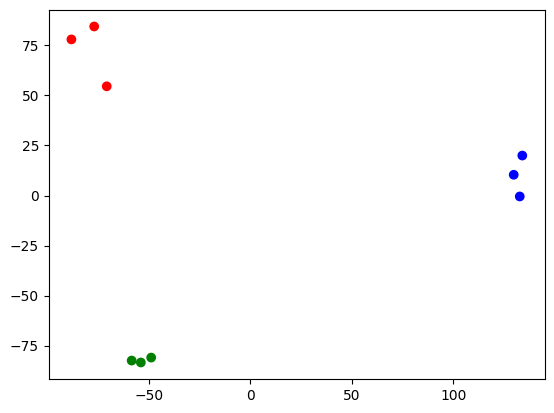

In [15]:
## Plot the PCs

## This can all be made to look a lot nicer and a bit more robust
import matplotlib.pyplot as plt

plt.scatter(x = principal_Df["PC1"], y = principal_Df["PC2"], c = ["r", "r", "r", "b", "b", "b", "g", "g", "g"])

plt.show()

# Differential expression using DESeq2 (generally this would be done in R, but as a python implementation is available I am using it)

### Set up our data

In [16]:
## raw counts is fed into deseq2 transposed compared to our usual format
counts_df = raw_counts.T

## We remove genes with very low counts (<10 counts across our samples)
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [17]:
counts_df.head()

gene_name,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
sw480_APC_1,3,10,6,1,3,56,0,1769,1004,1,...,1181,3173,5611,231,576,1185,504,5068,1362,721
sw480_APC_2,0,4,0,1,6,49,0,1613,858,0,...,1152,3173,5673,232,567,1056,470,4459,1247,700
sw480_APC_3,2,3,6,3,3,37,0,1661,852,2,...,1140,3035,5720,187,591,1082,449,4781,1190,663
sw480_CONTROL_1,0,6,0,1,4,101,1,3163,732,4,...,1208,2945,6892,84,252,1637,708,7802,1342,870
sw480_CONTROL_2,0,4,0,2,3,84,1,2814,627,3,...,1090,2600,6026,78,241,1431,576,7876,1111,698


In [18]:
## We make our metadata matrix - in this case we just have one condition with 3 levels
conditions = ["APC_mut"] * 3 + ["Control"] * 3 + ["WT"] * 3

metadata = pd.DataFrame(conditions, index= raw_counts.columns, columns=["condition"])

In [19]:
metadata.head()

,condition
sw480_APC_1,APC_mut
sw480_APC_2,APC_mut
sw480_APC_3,APC_mut
sw480_CONTROL_1,Control
sw480_CONTROL_2,Control


## Run deseq2 with Control as the "base factor" (will do a comparison of the other two factors against the control)

In [20]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [25]:
## We make the deseqdataset (the data structure deseq uses)
inference = DefaultInference(n_cpus=8)
dds_control = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    ref_level = ["condition", "Control"])

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/pydeseq2/dds.py:250: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [26]:
## Run deseq2 (differential expression analysis)
dds_control.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 3.74 seconds.

Fitting dispersion trend curve...
... done in 0.57 seconds.

Fitting MAP dispersions...
... done in 3.86 seconds.

Fitting LFCs...
... done in 2.05 seconds.

Refitting 0 outliers.



In [27]:
## Look at the log fold change values
dds_control.varm["LFC"].head()

,intercept,condition_WT_vs_Control,condition_APC-mut_vs_Control
gene_name,,,
A1BG,-0.441862,0.691755,0.974464
A1BG-AS1,1.882770,0.199183,-0.125465
A1CF,0.654262,1.609752,0.758610
A2M,0.514013,0.295340,0.033397
A2M-AS1,1.201979,1.157944,0.217510


### Calcluate p values and shrink LFCs for APC mut vs Control

In [33]:
## APC mut vs Control

## Set up the pvalue calculation
stat_res_APCvsControl = DeseqStats(dds, inference=inference, contrast = ["condition", "APC-mut", "Control"], quiet = True)

## Calculate p values
stat_res_APCvsControl.summary(quiet = True)

## We shrink our fold changes
stat_res_APCvsControl.lfc_shrink(coeff="condition_APC-mut_vs_Control")

Log2 fold change & Wald test p-value: condition APC-mut vs Control
              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_name                                                                  
A1BG          1.201651        1.405854  1.977431  0.710950  4.771152e-01   
A1BG-AS1      6.768256       -0.181008  0.756145 -0.239383  8.108088e-01   
A1CF          5.196975        1.094443  1.214437  0.901193  3.674857e-01   
A2M           1.888791        0.048182  1.310038  0.036779  9.706613e-01   
A2M-AS1       6.021168        0.313800  0.851291  0.368616  7.124137e-01   
...                ...             ...       ...       ...           ...   
ZXDC       1443.856959       -0.470903  0.056112 -8.392178  4.772174e-17   
ZYG11B      600.154339       -0.442228  0.082622 -5.352441  8.677569e-08   
ZYX        7164.599004       -0.699488  0.070940 -9.860332  6.184434e-23   
ZZEF1      1355.558492        0.019847  0.065251  0.304164  7.610028e-01   
ZZZ3        771.52102

In [37]:
## Save our output
stat_res_APCvsControl.results_df.to_csv("APC_APCmut_vs_Control_LFC.csv")

In [38]:
stat_res_APCvsControl.results_df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
A1BG,1.201651,0.179730,0.721434,0.710950,0.477115,NaN
A1BG-AS1,6.768256,-0.088518,0.531315,-0.239383,0.810809,0.856550
A1CF,5.196975,0.318664,0.695222,0.901193,0.367486,0.456261
A2M,1.888791,0.011717,0.645173,0.036779,0.970661,NaN
A2M-AS1,6.021168,0.136556,0.566561,0.368616,0.712414,0.778010


### Calcluate p values and shrink LFCs for WT vs Control

In [36]:
## WT vs Control

## Set up the pvalue calculation
stat_res_WTvsControl = DeseqStats(dds, inference=inference, contrast = ["condition", "WT", "Control"], quiet = True)

## Calculate p values
stat_res_WTvsControl.summary(quiet = True)

## We shrink our fold changes
stat_res_WTvsControl.lfc_shrink(coeff="condition_WT_vs_Control")

Log2 fold change & Wald test p-value: condition WT vs Control
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene_name                                                                     
A1BG          1.201651        0.997991  2.002514  0.498369  0.618224       NaN
A1BG-AS1      6.768256        0.287360  0.729053  0.394156  0.693466  0.801193
A1CF          5.196975        2.322382  1.170449  1.984181  0.047236  0.104023
A2M           1.888791        0.426085  1.264662  0.336916  0.736180       NaN
A2M-AS1       6.021168        1.670560  0.783977  2.130878  0.033099  0.077139
...                ...             ...       ...       ...       ...       ...
ZXDC       1443.856959        0.021101  0.054199  0.389330  0.697032  0.803785
ZYG11B      600.154339       -0.038217  0.079966 -0.477917  0.632709  0.756206
ZYX        7164.599004        0.104480  0.070460  1.482831  0.138119  0.247940
ZZEF1      1355.558492        0.195398  0.064515  3.028723  0.002456 

In [39]:
## Save our output
stat_res_WTvsControl.results_df.to_csv("APC_WT_vs_Control_LFC.csv")

In [40]:
### To get the final comparison (APC vs WT) we need to rerun deseq2 with WT as the "base factor"

In [41]:
## We make the deseqdataset (the data structure deseq uses)
inference = DefaultInference(n_cpus=8)
dds_WT = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    ref_level = ["condition", "WT"])

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/pydeseq2/dds.py:250: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [42]:
## Run deseq2 (differential expression analysis)
dds_WT.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.11 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 4.22 seconds.

Fitting LFCs...
... done in 2.07 seconds.

Refitting 0 outliers.



### Calculate p values and shrink LFC for APC vs WT

In [46]:
## APC vs WT

## Set up the pvalue calculation
stat_res_APCvsWT = DeseqStats(dds_WT, inference=inference, contrast = ["condition", "APC-mut", "WT"], quiet = True)

## Calculate p values
stat_res_APCvsWT.summary(quiet = True)

## We shrink our fold changes
stat_res_APCvsWT.lfc_shrink(coeff="condition_APC-mut_vs_WT")

Log2 fold change & Wald test p-value: condition APC-mut vs WT
              baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_name                                                                   
A1BG          1.201651        0.407862  1.831080   0.222744  8.237348e-01   
A1BG-AS1      6.768256       -0.468373  0.741481  -0.631672  5.276009e-01   
A1CF          5.196975       -1.227936  1.087648  -1.128983  2.589050e-01   
A2M           1.888791       -0.377896  1.265010  -0.298730  7.651462e-01   
A2M-AS1       6.021168       -1.356757  0.761441  -1.781828  7.477726e-02   
...                ...             ...       ...        ...           ...   
ZXDC       1443.856959       -0.492005  0.055958  -8.792452  1.463311e-18   
ZYG11B      600.154339       -0.404012  0.082595  -4.891469  1.000861e-06   
ZYX        7164.599004       -0.803968  0.070871 -11.344060  7.937469e-30   
ZZEF1      1355.558492       -0.175551  0.064621  -2.716652  6.594597e-03   
ZZZ3        77

In [47]:
## Save our output
stat_res_APCvsWT.results_df.to_csv("APC_APCmut_vs_WT_LFC.csv")

## We have now performed differential expression - to get genes of interest we need to calculate overlaps. The genes changed by APC manipulation should be those that overlap between the two APC mut comparisons, but excluding those different between WT and control

In [57]:
## APCmut vs WT
APCmut_vs_WT = stat_res_APCvsWT.results_df[stat_res_APCvsWT.results_df["padj"] <= 0.05]

APCmut_vs_WT = APCmut_vs_WT[abs(APCmut_vs_WT["log2FoldChange"]) > 2]

APCmut_vs_WT_genes = set(APCmut_vs_WT.index.tolist())

In [58]:
## APCmut vs Control
APCmut_vs_Control = stat_res_APCvsControl.results_df[stat_res_APCvsControl.results_df["padj"] <= 0.05]

APCmut_vs_Control = APCmut_vs_Control[abs(APCmut_vs_Control["log2FoldChange"]) > 2]

APCmut_vs_Control_genes = set(APCmut_vs_Control.index.tolist())

In [59]:
## WT vs Control
WT_vs_Control = stat_res_WTvsControl.results_df[stat_res_WTvsControl.results_df["padj"] <= 0.05]

WT_vs_Control = WT_vs_Control[abs(WT_vs_Control["log2FoldChange"]) > 2]

WT_vs_Control_genes = set(WT_vs_Control.index.tolist())

## Make a venn diagram

In [60]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

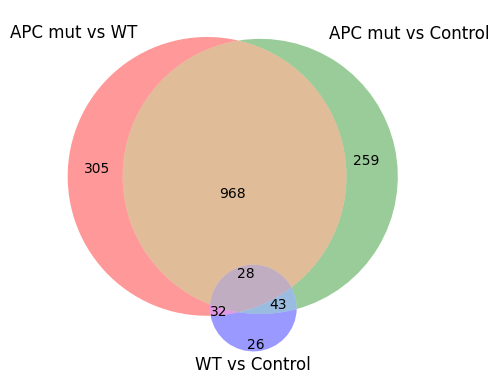

In [64]:
venn3([APCmut_vs_WT_genes, APCmut_vs_Control_genes, WT_vs_Control_genes]
     ,set_labels = ("APC mut vs WT", "APC mut vs Control", "WT vs Control"))
plt.show()

In [65]:
#### 968 genes are overlapping in the mutant conditions and not involved in the vector

In [72]:
APCmut_genes = list((APCmut_vs_Control_genes & APCmut_vs_WT_genes) - WT_vs_Control_genes)

## Make a heatmap

In [94]:
heatmap_genes = TPM_data.T[APCmut_genes].T

heatmap_genes = heatmap_genes.loc[~(heatmap_genes==0).all(axis=1)]


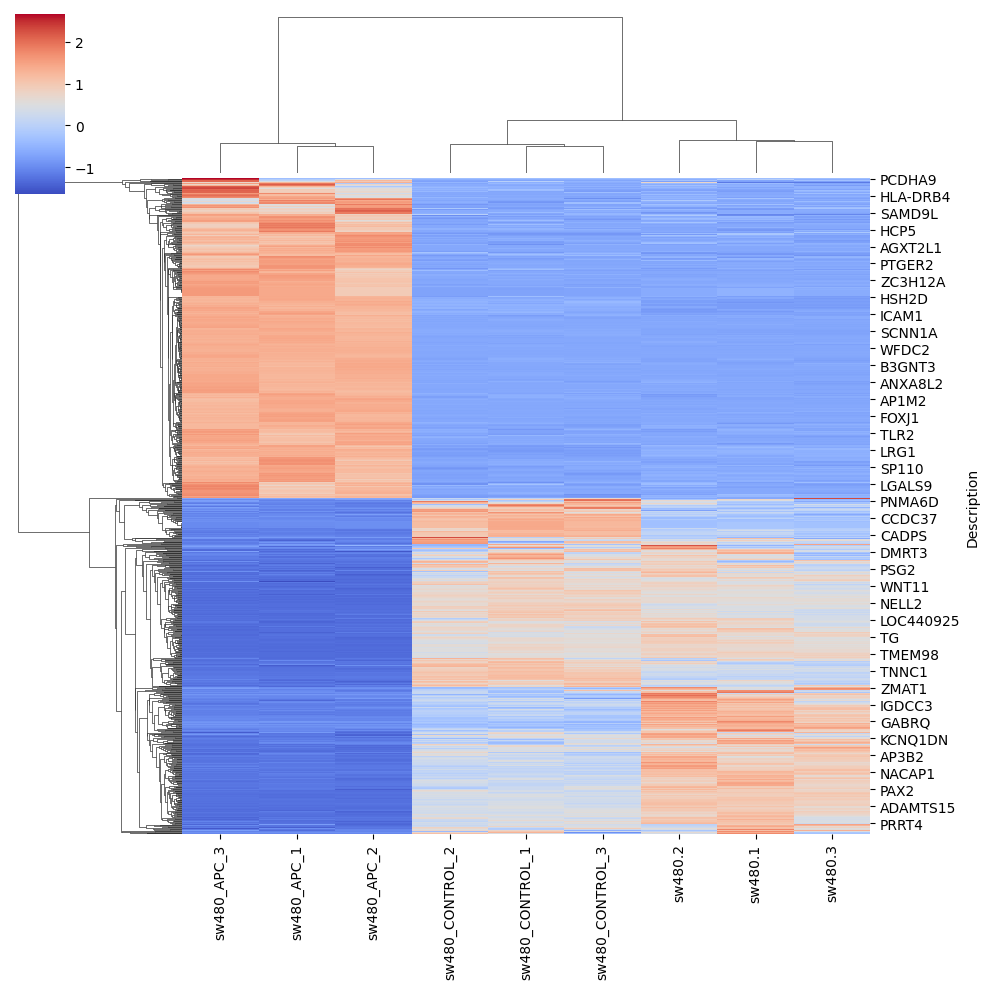

In [97]:
import seaborn as sns
sns.clustermap(heatmap_genes, z_score= 0, metric= "euclidean", cmap = "coolwarm")
plt.show()

## Do some enrichment

In [101]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
gp.profile(organism='hsapiens',
            query=APCmut_genes)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0071944,cell periphery,3.712001e-46,True,"""The broad region around and including the pla...",6202,826,428,22090,0.518160,0.069010,query_1,[GO:0110165]
1,GO:BP,GO:0032501,multicellular organismal process,1.951031e-42,True,"""Any biological process, occurring at the leve...",7648,785,478,21010,0.608917,0.062500,query_1,[GO:0008150]
2,GO:CC,GO:0005886,plasma membrane,1.836877e-37,True,"""The membrane surrounding a cell that separate...",5717,826,387,22090,0.468523,0.067693,query_1,"[GO:0016020, GO:0071944]"
3,GO:BP,GO:0048856,anatomical structure development,1.207000e-34,True,"""The biological process whose specific outcome...",5862,785,386,21010,0.491720,0.065848,query_1,[GO:0032502]
4,GO:BP,GO:0007275,multicellular organism development,2.217085e-33,True,"""The biological process whose specific outcome...",4610,785,327,21010,0.416561,0.070933,query_1,"[GO:0032501, GO:0048856]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,GO:BP,GO:0051246,regulation of protein metabolic process,4.928031e-02,True,"""Any process that modulates the frequency, rat...",2389,785,127,21010,0.161783,0.053160,query_1,"[GO:0019538, GO:0051171, GO:0060255, GO:0080090]"
647,GO:BP,GO:0043393,regulation of protein binding,4.959628e-02,True,"""Any process that modulates the frequency, rat...",202,785,21,21010,0.026752,0.103960,query_1,[GO:0051098]
648,GO:BP,GO:0007420,brain development,4.970564e-02,True,"""The process whose specific outcome is the pro...",744,785,51,21010,0.064968,0.068548,query_1,"[GO:0007417, GO:0048513, GO:0060322]"
649,WP,WP:WP2328,Allograft rejection,4.984951e-02,True,Allograft rejection,88,465,14,8625,0.030108,0.159091,query_1,[WP:000000]


In [106]:
import gseapy as gp

enr = gp.enrichr(gene_list=APCmut_genes, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [108]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Inflammatory Response,45/200,2.535155e-18,1.166171e-16,0,0,5.937616,240.570084,RTP4;CXCL6;CSF3;CSF1;PTGER2;ITGB3;EBI3;PTAFR;L...
1,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,39/200,6.981086e-14,1.605650e-12,0,0,4.920599,149.059626,CXCL6;CSF2;SDC4;CSF1;PLEK;TNFAIP2;TNFAIP3;CXCL...
2,MSigDB_Hallmark_2020,KRAS Signaling Up,37/200,1.638457e-12,2.512301e-11,0,0,4.600588,124.847375,SNAP25;SPON1;CSF2;SATB1;CXCR4;TNFAIP3;PTGS2;HD...
3,MSigDB_Hallmark_2020,Interferon Gamma Response,34/200,1.447871e-10,1.665052e-09,0,0,4.137174,93.730806,RTP4;CD274;SAMD9L;CIITA;TNFAIP2;TNFAIP3;PTGS2;...
4,MSigDB_Hallmark_2020,Allograft Rejection,31/200,9.300026e-09,8.556024e-08,0,0,3.692718,68.290355,CSF1;GCNT1;FASLG;HDAC9;CTSS;ICAM1;CCND2;NLRP3;...
...,...,...,...,...,...,...,...,...,...,...
314,KEGG_2021_Human,HIF-1 signaling pathway,1/109,9.955817e-01,9.999922e-01,0,0,0.181202,0.000802,NOS2
315,KEGG_2021_Human,Amyotrophic lateral sclerosis,8/364,9.970745e-01,9.999922e-01,0,0,0.437172,0.001281,NOS2;KIF5A;SLC1A2;CASP1;RAB39B;NRG1;COX7B2;PRPH
316,KEGG_2021_Human,Insulin signaling pathway,1/137,9.989060e-01,9.999922e-01,0,0,0.143683,0.000157,SHC2
317,KEGG_2021_Human,Protein processing in endoplasmic reticulum,1/171,9.997976e-01,9.999922e-01,0,0,0.114739,0.000023,CRYAB


In [110]:
## Gene list which can be copy-pasted into many online tools as well
for item in APCmut_genes:
    print(item)

VSTM1
KIF17
OR2A20P
PRR15
SAA2-SAA4
SRGN
ASB2
LRCOL1
ZNF878
UGT1A1
RNASE1
ITGAM
SCN4A
MAOB
APOL3
PCDHA7
MANSC4
HIST1H2AC
HIST2H4A
ALOXE3
FHDC1
RNF144A
FLJ42351
NEU4
PXDN
CES5A
SH2D3A
ASB4
GSX1
ABLIM3
TRIM34
FEZ1
CCL20
CGNL1
ACOX2
SLC12A7
KCNS3
KRT16
C1QTNF1
NR3C2
SLC44A3
NOD2
LRRC16B
TMC4
PDE4D
RYR1
ZAP70
FA2H
C1orf106
SPON1
CAPN6
ZNF185
PCDHA4
PPP1R1B
REEP2
SGK2
BCL2L15
OVOL2
IL10
NDRG1
PHLDA3
WFDC2
CD79B
ARHGEF16
NIPAL1
FBLN7
BTC
GPR126
HDX
PPFIBP1
LCK
RBP7
FXYD6-FXYD2
CACNG6
MATN2
SSPN
LOC100506178
HIST1H2BC
CHRNB4
NEURL
ADAM19
REPS2
ADRA1D
PKDCC
SLC4A8
LDLRAD4
MET
NTRK2
IGDCC4
BDKRB2
CEACAM1
CNTFR
FGD4
KCTD12
CTHRC1
ATRNL1
PLP1
CD52
SPNS3
IL2RB
C15orf62
IL1RAP
KRT39
MYO1D
SLIT1
ZC3H12A
SP110
RLBP1
SUSD4
F3
GRM8
HIST2H2BF
RNF157-AS1
ABCB4
PSG2
MMP17
ESPN
WIPF3
MUC16
SLC15A3
ELF3
CENPVP1
SP140L
PNMA6D
KCNJ4
TNFRSF6B
IL21R
SLC22A17
CACNA1C
ALDH1A3
CXCL10
ANKRD20A5P
CADPS
HSD17B2
RASGEF1B
MANEA
ITIH3
RARRES3
KLHDC7A
SMIM1
JPH3
FASLG
RUNX2
TMEM45A
OAS2
OXGR1
CX3CL1
PMP22
RLN2
SMAD6
IFIH